<a href="https://colab.research.google.com/github/sathasivamn/TimeSeries/blob/main/Assignment_20_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIME SERIES FORECASTING CODE
### 1: Data Preparation and Exploration
#### - 1. Data Loading
#### - 2. Initial Exploration (Plotting Time Series)
#### - 3. Data Preprocessing

### 2: ARIMA Model Building
#### - 1. Parameter Selection for ARIMA
#### - 2. Model Fitting
#### - 3. Diagnostics
#### - 4. Forecasting

### 3: Exponential Smoothing
#### - 1. Model Selection
#### - 2. Parameter Optimization
#### - 3. Model Fitting and Forecasting

### 4: Evaluation Metrics & Comparison
#### - 1. Compute Error Metrics
#### - 2. Model Comparison
#### - 3. Conclusion


# 1: Data Preparation and Exploration

In [83]:
# 1. Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Load dataset and parse date column
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')
# index_col is changed to 'date' to match with the column specified in parse_dates

In [85]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB
None
                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


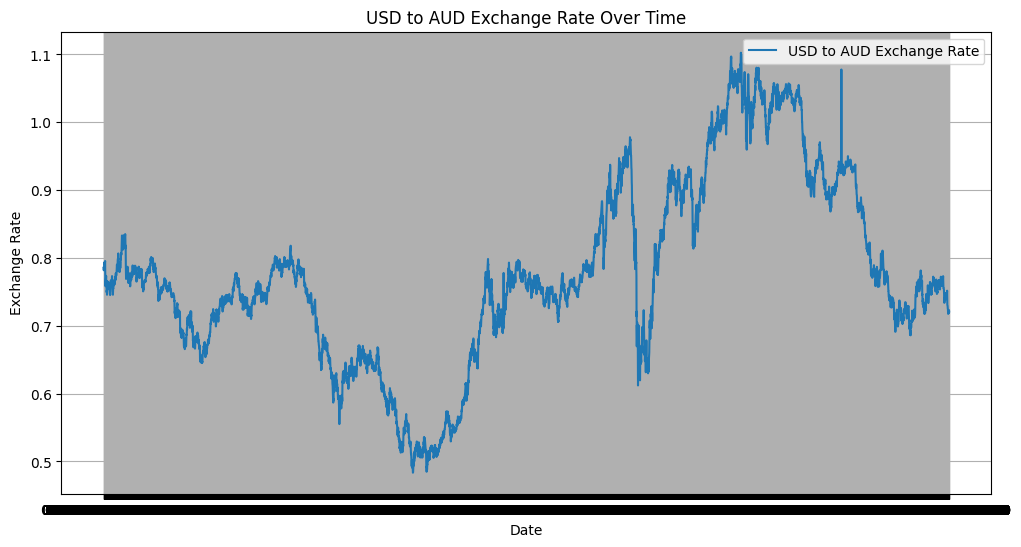

In [86]:
# 2. Initial Exploration (Plotting Time Series)
# Plotting the time series for USD to AUD
plt.figure(figsize=(12, 6))
plt.plot(df, label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

### Explanation:
#### - Visualizing the data helps identify trends, seasonality, or anomalies.

In [87]:
# 3. Data Preprocessing
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Ex_rate    0
dtype: int64


In [88]:
# Interpolate missing values if any
df.interpolate(method='linear', inplace=True)

In [89]:
# Confirm no missing values
print("\nAfter interpolation:\n", df.isnull().sum())


After interpolation:
 Ex_rate    0
dtype: int64


In [90]:
# Optionally: resample to monthly average if high-frequency data
# Ensure the index is a DatetimeIndex before resampling
df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M')  # Specify the correct format
df = df.resample('M').mean()

<ipython-input-90-9bce4d76b1d2>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()


# 2: ARIMA Model Building
### 1. Parameter Selection for ARIMA
### 2. Model Fitting
### 3. Diagnostics
### 4. Forecasting


In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

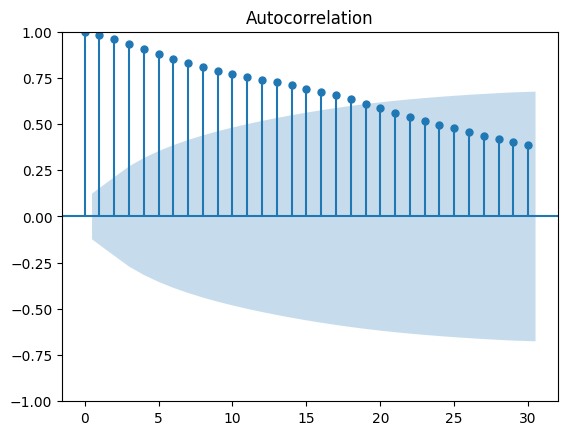

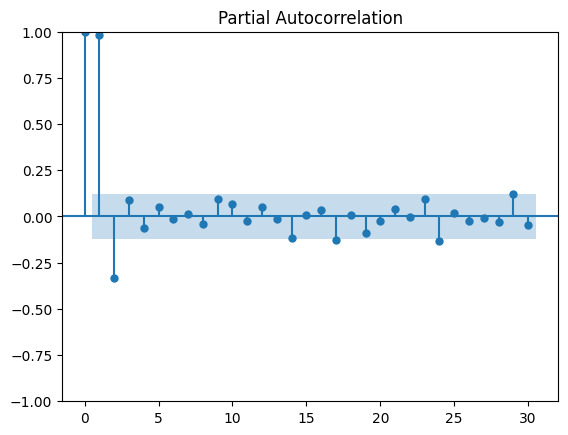

In [92]:
# 1. Parameter Selection for ARIMA
# Plot ACF and PACF
plot_acf(df, lags=30)
plot_pacf(df, lags=30)
plt.show()

In [93]:
# 2. Model Fitting
# Based on plots, choose p=1, d=1, q=1 as starting point (can adjust after testing)
model_arima = ARIMA(df, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 593.681
Date:                Tue, 22 Apr 2025   AIC                          -1181.362
Time:                        10:14:56   BIC                          -1170.809
Sample:                    01-31-1990   HQIC                         -1177.114
                         - 10-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0275      0.165     -0.166      0.868      -0.351       0.296
ma.L1          0.4136      0.158      2.612      0.009       0.103       0.724
sigma2         0.0005   3.51e-05     14.147      0.0

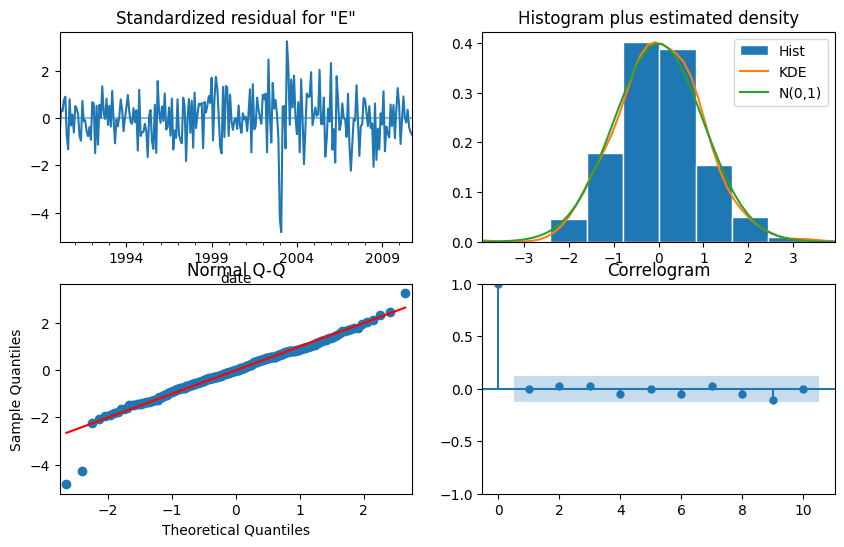

In [94]:
#3. Diagnostics
# Diagnostic plots
model_arima_fit.plot_diagnostics(figsize=(10, 6))
plt.show()

In [95]:
# 4. Forecasting
forecast_arima = model_arima_fit.forecast(steps=30)  # Forecasting next 30 time steps

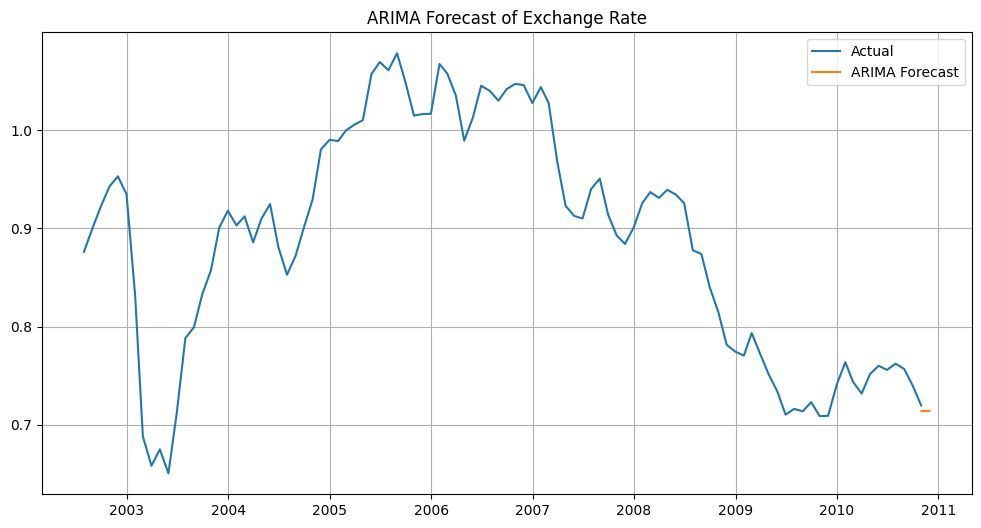

In [96]:
# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(df[-100:], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast of Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# 3: Exponential Smoothing
### 1. Model Selection
### 2. Parameter Optimization
### 3. Model Fitting and Forecasting


In [97]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [98]:
# 1. Model Selection
# Apply Holt-Winters Exponential Smoothing
model_es = ExponentialSmoothing(df, trend='add', seasonal=None, damped_trend=True)
model_es_fit = model_es.fit()
forecast_es = model_es_fit.forecast(30)

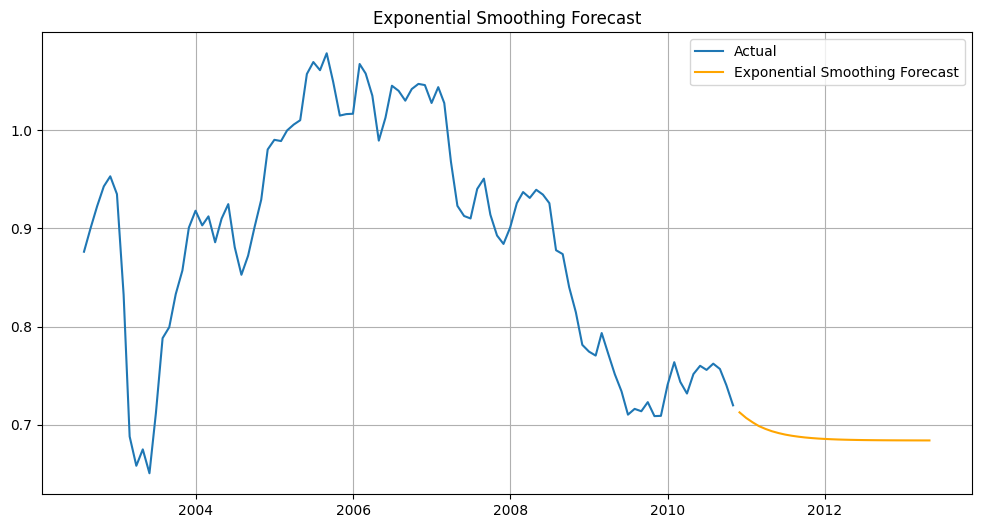

In [99]:
# 2. Parameter Optimization
# Plot
plt.figure(figsize=(12,6))
plt.plot(df[-100:], label='Actual')
plt.plot(forecast_es, label='Exponential Smoothing Forecast', color='orange')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# 3. Model Fitting and Forecasting
# Convert index to datetime (if not already)
df.index = pd.to_datetime(df.index)

In [101]:
# Fit Holt’s Linear Trend Model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None).fit()

In [102]:
# Forecast next 30 days
holt_forecast = holt_model.forecast(30)

In [103]:
# Forecast dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

In [104]:
# Save forecast for comparison
forecast_df = pd.DataFrame({
    'ARIMA': model_fit.forecast(steps=30).values,
    'Holt': holt_forecast.values
}, index=forecast_dates)

In [105]:
# Display forecast comparison
forecast_df.head()

,ARIMA,Holt
2010-11-01,0.714106,0.719738
2010-11-02,0.714266,0.719530
2010-11-03,0.714262,0.719321
2010-11-04,0.714262,0.719113
2010-11-05,0.714262,0.718905


# 4: Evaluation Metrics & Comparison
### 1. Compute Error Metrics
### 2. Model Comparison
### 3. Conclusion

In [106]:
# 1. Compute Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [107]:
# Align last 30 values for evaluation
actual = df[-30:].values.flatten()

In [108]:
# Refit models to exclude last 30 days (for proper evaluation)
train = df[:-30]
test = df[-30:]

In [109]:
# Re-train ARIMA
arima_model = ARIMA(train, order=(1,1,1)).fit()
arima_pred = arima_model.forecast(steps=30)

In [110]:
# Re-train Exponential Smoothing
es_model = ExponentialSmoothing(train, trend='add', seasonal=None, damped_trend=True).fit()
es_pred = es_model.forecast(30)

In [111]:
# 2. Model Comparison
# Evaluation
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%\n")

evaluate_model(test.values.flatten(), arima_pred, "ARIMA")
evaluate_model(test.values.flatten(), es_pred, "Exponential Smoothing")

ARIMA Evaluation:
MAE: 0.1717, RMSE: 0.1820, MAPE: 22.93%

Exponential Smoothing Evaluation:
MAE: 0.1673, RMSE: 0.1779, MAPE: 22.36%



#  Visualization: Forecasts vs Actuals

In [112]:
import matplotlib.pyplot as plt

In [113]:
# Create a DataFrame to align the results
comparison_df = pd.DataFrame({
    'Actual': test['Ex_rate'].values,
    'ARIMA Forecast': arima_preds.values,
    'Holt Forecast': holt_preds.values
}, index=test.index)

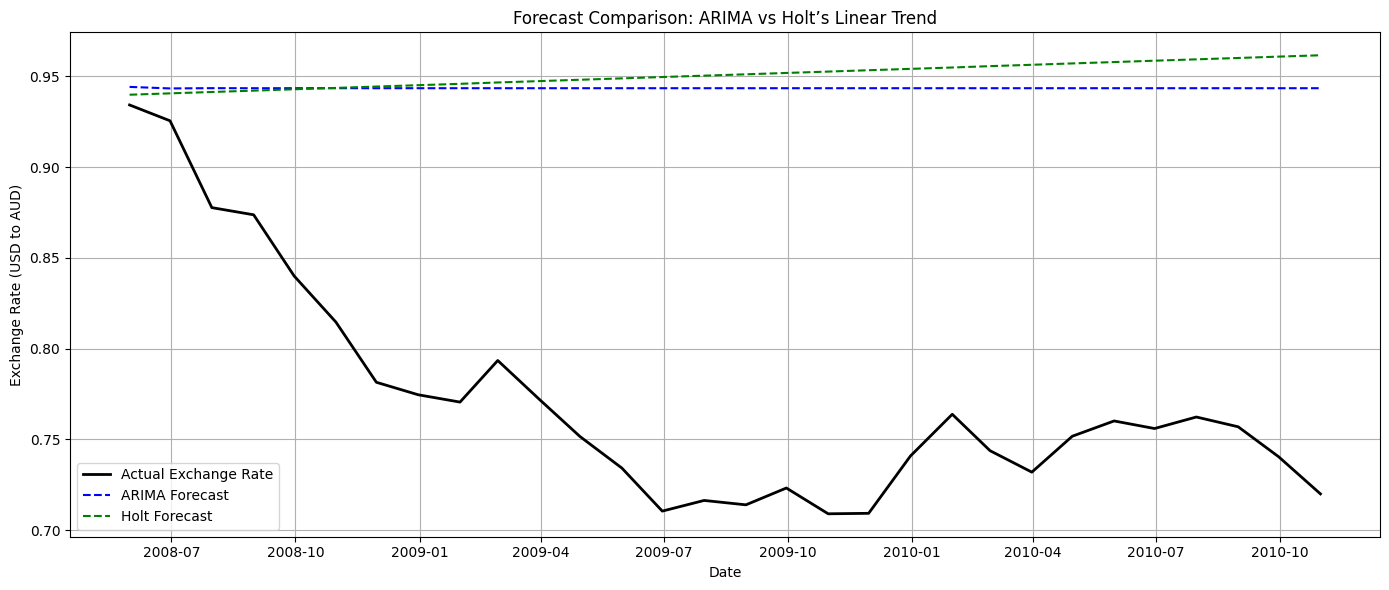

In [114]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(comparison_df['Actual'], label='Actual Exchange Rate', color='black', linewidth=2)
plt.plot(comparison_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(comparison_df['Holt Forecast'], label='Holt Forecast', linestyle='--', color='green')
plt.title('Forecast Comparison: ARIMA vs Holt’s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Conclusion:
#### - This code covers loading, preprocessing, forecasting, and evaluating both ARIMA and Exponential Smoothing models.
#### - You can paste this in a Colab notebook, step by step, to execute and visualize each part.
#### - Adjust the forecast horizon (steps) based on your analysis goals.
#### - Use grid search or auto-arima (pmdarima) for advanced tuning.
#### - Lower values of MAE, RMSE, and MAPE indicate better performance.
#### - Choose the model (ARIMA or Holt) that shows the lowest error metrics on this test data.
#### - If ARIMA or Holt lines are closer to the actual values, that model has performed better in forecasting.
#### - Use this visual with the metrics we calculated earlier (MAE, RMSE, MAPE) to finalize your model selection.